In [29]:
from os.path import join
import pyelsa as elsa
import aomip
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mig
import utils
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import signal
# from GradientDescent import gradient_descent
# import sympy
from skimage.transform import radon, rescale
import preprocessing
import time
import scipy.io
from tifffile import imsave

# Challenge Dataset

In [28]:
data_path = '/Users/boeykaizhe/Documents/TUM/htc2022_test_data'
file_name = 'htc2022_01a_full.mat'
# Load mat file
mat = scipy.io.loadmat(join(data_path,file_name))

# Access data in the mat file
data = mat['CtDataFull']
CtData=data[0][0][1]

size = np.array([512, 512])

num_angles = 721
arc = 360

s2c = size[0] * 1
c2d = size[0] * 0.5
D = s2c + c2d
A = aomip.XrayOperator(size, [721], np.linspace(0, arc, 560), s2c, c2d)

H = np.linspace(-1, 1, CtData.shape[0])

ram_lak = np.abs(H)
shepp_logan = np.abs(H) * np.sinc(H / 2)
cosine = np.abs(H) * np.cos(H * np.pi / 2)

h = np.tile(shepp_logan, (560, 1)).T
fftsino = np.fft.fft(CtData, axis=0)
projection = np.fft.fftshift(fftsino, axes=1) * np.fft.fftshift(h, axes=0)
fsino = np.real(np.fft.ifft(np.fft.ifftshift(projection, axes=1), axis=0))

x=A.applyAdjoint(CtData.flatten())



[2023-05-08 10:03:49.386] [CircleTrajectoryGenerator] [info] creating 2D trajectory with 360 poses in an 360 degree arc


ValueError: operands could not be broadcast together with shapes (721,560) (721,360) 

/var/folders/pb/tb9th22s1bg2w5j250zz59s80000gn/T/ipykernel_45381/1628832272.py:4: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave('challenge_reconstruction.tif', x)


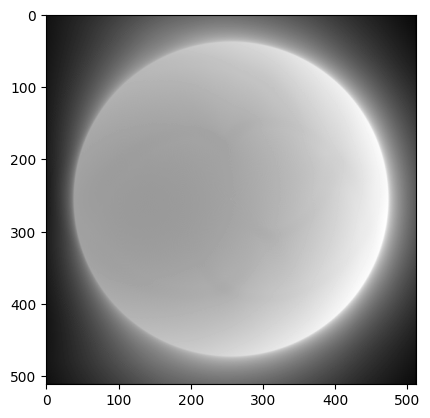

In [30]:
# print(A.shape)
# print(CtData.shape)
plt.imshow(x, cmap='gray')
imsave('challenge_reconstruction.tif', x)
utils.save_array_as_image(x,'challenge_reconstruction.png','Img')

In [31]:
kk=plt.imread("challenge_reconstruction.tif")

In [36]:
kk[0]

array([[  1,   1,   1, 255],
       [  1,   1,   1, 255],
       [  1,   1,   1, 255],
       ...,
       [  1,   1,   1, 255],
       [  1,   1,   1, 255],
       [  0,   0,   0, 255]], dtype=uint8)